# Import vars from pickle

In [9]:
## pickleで保存したファイルを読み込み
import pickle

with open(f'/home/shin/lab/00_project/SARIMAX/pickles/20240930-123659/vars.pickle', mode='rb') as fi:
    data = pickle.load(fi)

### 保存した変数を個別に取得 (全て '_loaded' を付けた形に変更)
# loaded_sarimax_model = data['sarimax_model']
loaded_start_test_date = data['start_test_date']
loaded_end_test_date = data['end_test_date']
# loaded_pd_exog_data_test = data['pd_exog_data_test']
# loaded_exo_data = data['exo_data']
# loaded_predict_value = data['predict_value']
loaded_predict_timeline_list = data['predict_timeline_list']
loaded_predict_value_list = data['predict_value_list']
loaded_all_concated = data['all_concated']
loaded_best_param_arima = data['best_param_arima']  
loaded_best_param_seasonal = data['best_param_seasonal']  
# loaded_train_days = data['train_days']  

In [10]:
# マイナスの値をゼロに書き換える
loaded_predict_value_list = [0 if x < 0 else x for x in loaded_predict_value_list]

print(loaded_predict_value_list)

[877.8045733815695, 856.498819781975, 888.1219506270933, 892.2809961813065, 864.2979088226315, 813.4358763720835, 779.0882719832464, 763.001832891116, 713.2874615073947, 657.4088172207323, 629.316729563775, 663.7654964905337, 654.8677750441902, 665.6665733174164, 719.15627600926, 680.3499457462499, 704.7753786921678, 772.9659252870754, 774.0073196938993, 798.1003323760867, 805.3480084321247, 836.970118292352, 848.4493578795883, 857.3182548890952, 872.2534298309324, 888.6235683902917, 905.3049504115528, 865.594456291918, 844.3910093194411, 847.2430798264556, 791.0240052257179, 761.9077469403288, 713.9980873747904, 670.3854753432374, 616.7729551204043, 647.2451886099008, 662.8771548002161, 639.1444104815783, 662.1115680065229, 674.4385357941109, 719.526803989864, 760.0638648565813, 741.1786484958673, 779.888188921411, 822.0425957475502, 895.019802368687, 866.7127377825366, 839.9731948730321, 890.3067934094147, 901.0135196771702, 910.7946760329534, 889.075456058777, 843.7556161463373, 840

# Set date

In [11]:
from datetime import datetime

train_start_date    = '2018-04-01 00:00:00'
train_end_date      = '2018-06-30 23:59:59'
test_start_date     = '2018-07-01 00:00:00'
test_end_date       = '2018-07-11 22:59:59'

train_st = datetime.strptime(train_start_date, '%Y-%m-%d %H:%M:%S')
train_en = datetime.strptime(train_end_date, '%Y-%m-%d %H:%M:%S')
test_st = datetime.strptime(test_start_date, '%Y-%m-%d %H:%M:%S')
test_en = datetime.strptime(test_end_date, '%Y-%m-%d %H:%M:%S')

train_pop = loaded_all_concated[train_st:train_en]['pop_hours']
test_pop  = loaded_all_concated[test_st:test_en]['pop_hours']

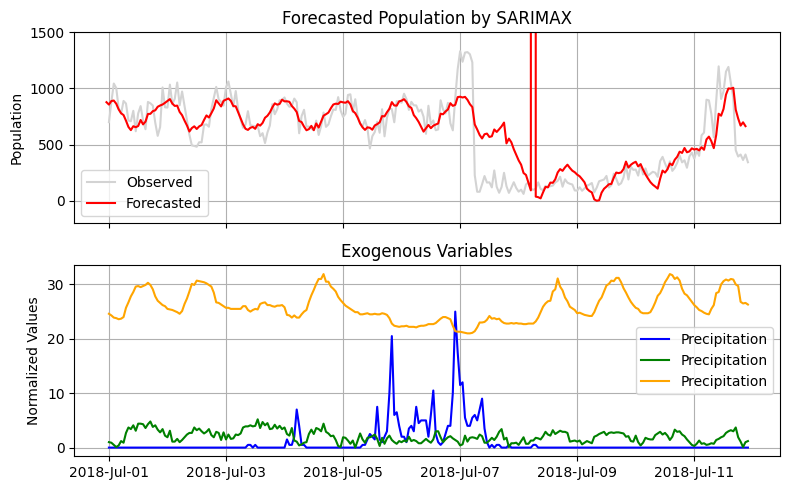

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 2つのグラフを作成 (2行1列)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5),sharex=True)

# 上のグラフ
ax1.plot(loaded_all_concated[test_st:test_en]['pop_hours'], label='Observed',color='lightgray')
ax1.plot(loaded_predict_timeline_list, loaded_predict_value_list, label='Forecasted',color='red')
ax1.set_ylim(-200, 1500)
ax1.set_title('Forecasted Population by SARIMAX')
ax1.set_ylabel('Population')
ax1.grid()
ax1.legend()

# 下のグラフ
ax2.plot(loaded_all_concated[test_st:test_en]['y_precipitation'], label='Precipitation', color='blue')
ax2.plot(loaded_all_concated[test_st:test_en]['y_windspeed'], label='Precipitation', color='green')
ax2.plot(loaded_all_concated[test_st:test_en]['y_temperature'], label='Precipitation', color='orange')
ax2.set_title('Exogenous Variables')
ax2.set_ylabel('Normalized Values')
ax2.grid()
ax2.legend()


# フォーマットを月単位に設定
formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月形式で表示
ax2.xaxis.set_major_formatter(formatter)

# x軸のラベルを縦向きに回転
# ax2.tick_params(axis='x', rotation=90)

# 両方のグラフに共通のx軸ラベル
# fig.supxlabel('Date')

# グラフの表示
plt.tight_layout()  # レイアウトを自動調整
plt.show()

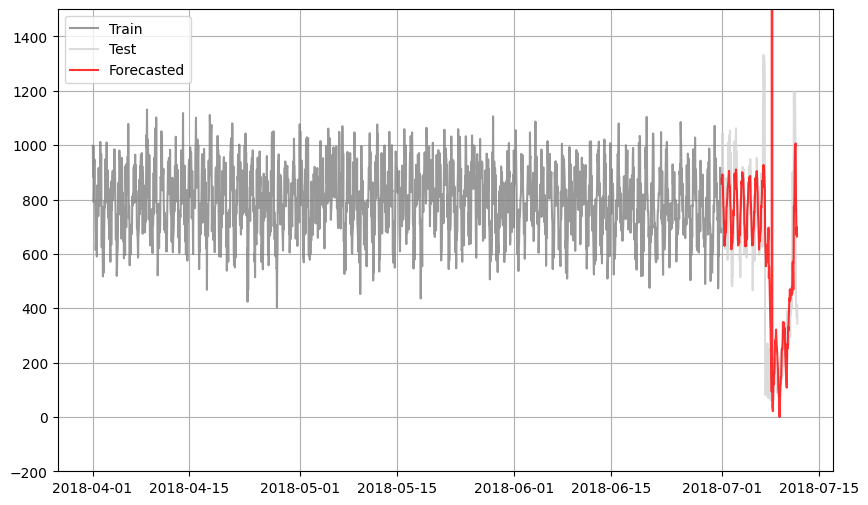

In [13]:
import matplotlib.pyplot as plt
alpha=0.8

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(10, 6))  # Figureサイズの設定 (幅, 高さ)

# データのプロット
ax.plot(train_pop, label='Train',color='gray',alpha=alpha)
ax.plot(test_pop, label='Test',color='lightgray',alpha=alpha)
ax.plot(loaded_predict_timeline_list, loaded_predict_value_list, label='Forecasted',color='red',alpha=alpha)


# y軸の範囲を設定
ax.set_ylim(-200, 1500)

# 凡例を表示
ax.legend()
ax.grid()

# グラフを表示
plt.show()

In [14]:
def Mape(predict, observed):
  absolute_diff_percentage =  abs( (predict - observed) / observed)
  # print(f'Each diff ratio on each hour: {absolute_diff_percentage}')
  sum_abs_diff = sum(absolute_diff_percentage)
  # print()
  # print(f'SUM: {sum_abs_diff}')

  mape = (sum_abs_diff / len(predict))*100 #パーセント表記
  print(f'MAPE : {mape:.1f}%')
  #mape は GroudTruth を基準にしたときの予測値のずれの比率について，全データを計算したときの，データ1つあたりの平均

In [15]:
Mape_val=Mape(loaded_predict_value_list,test_pop)
# MAPE : 0.2195586694066084

MAPE : 2411775.6%


In [16]:
loaded_predict_value_list                   

[877.8045733815695,
 856.498819781975,
 888.1219506270933,
 892.2809961813065,
 864.2979088226315,
 813.4358763720835,
 779.0882719832464,
 763.001832891116,
 713.2874615073947,
 657.4088172207323,
 629.316729563775,
 663.7654964905337,
 654.8677750441902,
 665.6665733174164,
 719.15627600926,
 680.3499457462499,
 704.7753786921678,
 772.9659252870754,
 774.0073196938993,
 798.1003323760867,
 805.3480084321247,
 836.970118292352,
 848.4493578795883,
 857.3182548890952,
 872.2534298309324,
 888.6235683902917,
 905.3049504115528,
 865.594456291918,
 844.3910093194411,
 847.2430798264556,
 791.0240052257179,
 761.9077469403288,
 713.9980873747904,
 670.3854753432374,
 616.7729551204043,
 647.2451886099008,
 662.8771548002161,
 639.1444104815783,
 662.1115680065229,
 674.4385357941109,
 719.526803989864,
 760.0638648565813,
 741.1786484958673,
 779.888188921411,
 822.0425957475502,
 895.019802368687,
 866.7127377825366,
 839.9731948730321,
 890.3067934094147,
 901.0135196771702,
 910.79467